## Task 4: Route Visualization

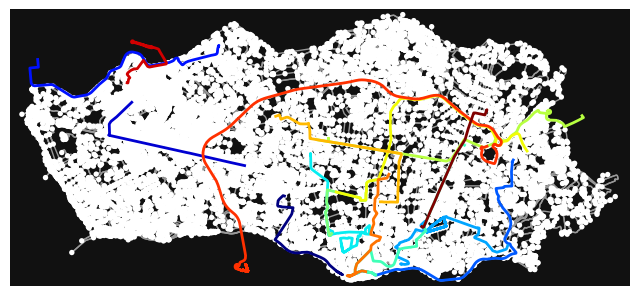

In [2]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import matplotlib.pyplot as plt
from shapely.wkt import loads
import numpy as np

def visualize_first_15_routes(output_csv_file):
    # Load the output CSV file into a DataFrame
    df = pd.read_csv(output_csv_file)

    # Attempt to convert the 'mgeom' column from WKT format to a geometry object
    # and skip rows with invalid geometries
    geometries = []
    for wkt in df['mgeom']:
        try:
            geometry = loads(wkt)
            geometries.append(geometry)
        except:
            geometries.append(None)
    df['geometry'] = geometries
    df = df.dropna(subset=['geometry'])

    # Convert DataFrame to GeoDataFrame
    gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

    # Visualize the first 15 routes with different colors
    fig, ax = ox.plot_graph(ox.graph_from_place("Porto, Portugal"), show=False, close=False)
    
    colors = plt.cm.jet(np.linspace(0,1,15))  # Use jet colormap to generate 15 distinct colors
    
    for i, geometry in enumerate(gdf['geometry'].head(15)):
        if geometry.geom_type == 'LineString':
            x, y = geometry.xy
            ax.plot(x, y, color=colors[i], linewidth=2)
        elif geometry.geom_type == 'MultiLineString':
            for line in geometry:
                x, y = line.xy
                ax.plot(x, y, color=colors[i], linewidth=2)
    
    plt.show()

# Call the function with the path to your output CSV
visualize_first_15_routes("data/matched_routines.csv")
